In [2]:
import numpy as np
import pandas as pd
import os
import time
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap

from filepath.filepath import *
import superpixel
import expand

# Preprocessing

## File name path

### 4X file path

In [4]:
fp_4x = normal_11999_4x + canceer_11999_4x + normal_11693_4x + canceer_11693_4x
print(np.shape(fp_4x))

(279,)


### 10X file path

In [5]:
fp_10x = partial_11693_10x + innercanceer_11693_10x + farcanceer_11693_10x + canceer_11693_10x + partial_11999_10x + innercanceer_11999_10x + farcanceer_11999_10x + canceer_11999_10x
print(np.shape(fp_10x))

(106,)


## Super pixel processing

In [4]:
for i, file_path in enumerate(fl):
    tic = time.time()
    groups,km_labels = superpixel.superpixel(file_path)    
    print(file_path, end='        ')
    print(str(i) + '/ ' + str(np.shape(fl)[0]-1), end='        ')g
    toc = time.time()
    spent = toc-tic
    print('%.2fs'%spent)

/11693李增荣/R/10X-2500/partial/1        0/ 105        86.27s
/11693李增荣/R/10X-2500/partial/2        1/ 105        78.78s
/11693李增荣/R/10X-2500/partial/3        2/ 105        78.07s
/11693李增荣/R/10X-2500/partial/4        3/ 105        74.75s
/11693李增荣/R/10X-2500/partial/5        4/ 105        82.01s
/11693李增荣/R/10X-2500/partial/6        5/ 105        79.25s
/11693李增荣/R/10X-2500/partial/7        6/ 105        84.87s
/11693李增荣/R/10X-2500/partial/8        7/ 105        81.02s
/11693李增荣/R/10X-2500/partial/9        8/ 105        90.50s
/11693李增荣/R/10X-2500/partial/10        9/ 105        92.17s
/11693李增荣/R/10X-2500/inner canceer/1        10/ 105        84.32s
/11693李增荣/R/10X-2500/inner canceer/2        11/ 105        88.58s
/11693李增荣/R/10X-2500/inner canceer/3        12/ 105        85.92s
/11693李增荣/R/10X-2500/inner canceer/4        13/ 105        83.40s
/11693李增荣/R/10X-2500/inner canceer/5        14/ 105        81.86s
/11693李增荣/R/10X-2500/inner canceer/6        15/ 105        77.02s
/11693李增荣/R/1

## Select super pixel

In [ ]:
file_path = canceer_11999_4x[20]
print(file_path)
km_labels = loadmat(file_path+'/km_labels.mat')['km_labels'] + 1
groups = loadmat(file_path+'/groups.mat')['groups']
ss = StandardScaler()
groups = ss.fit_transform(groups)
plt.imshow(loadmat(file_path+'/m11.mat')['CalibratedM11'])

(489,)
percent10
(48,)


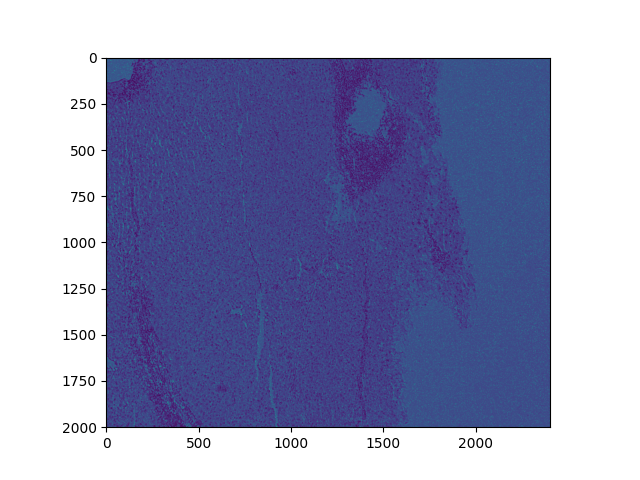

percent20
(97,)


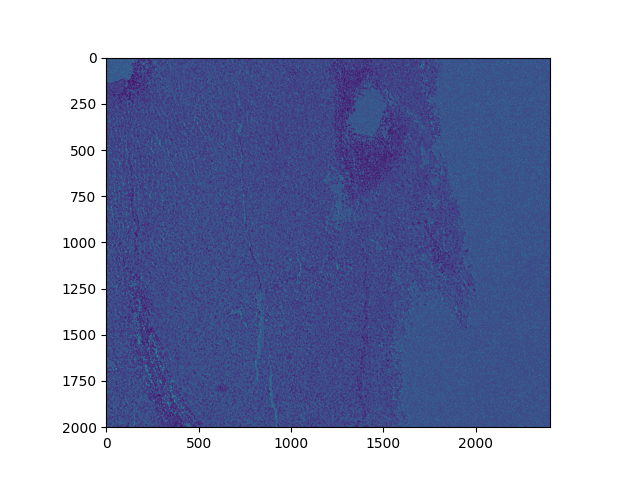

percent30
(146,)


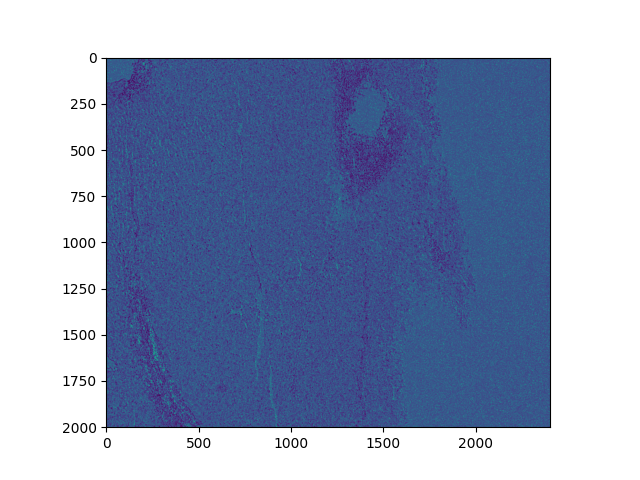

percent40
(195,)


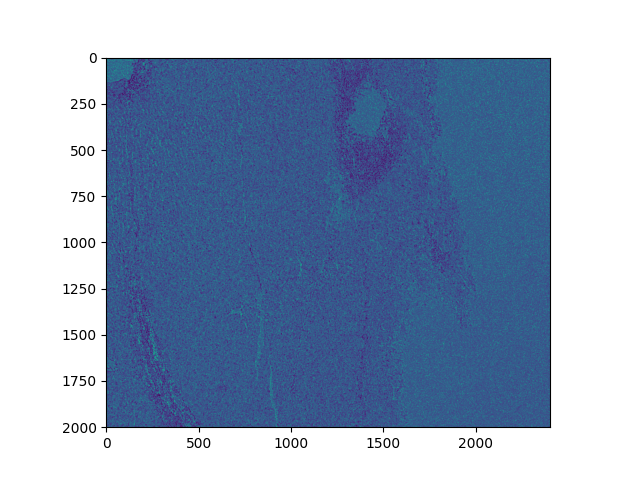

percent50
(244,)


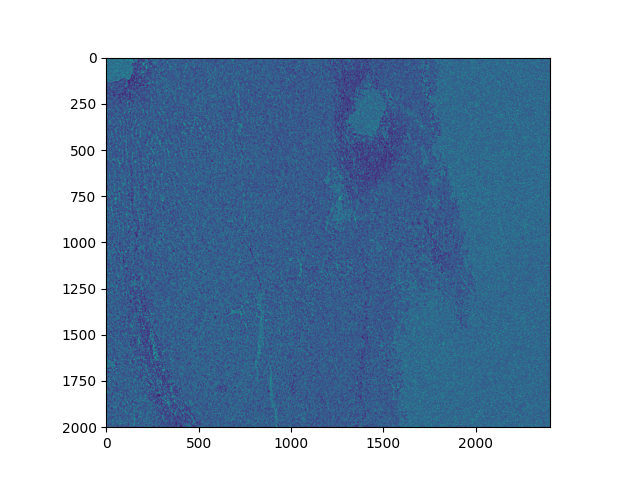

percent60
(292,)


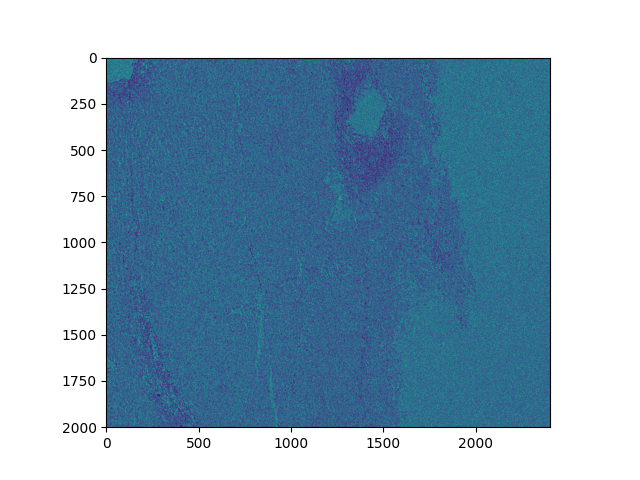

percent70
(341,)


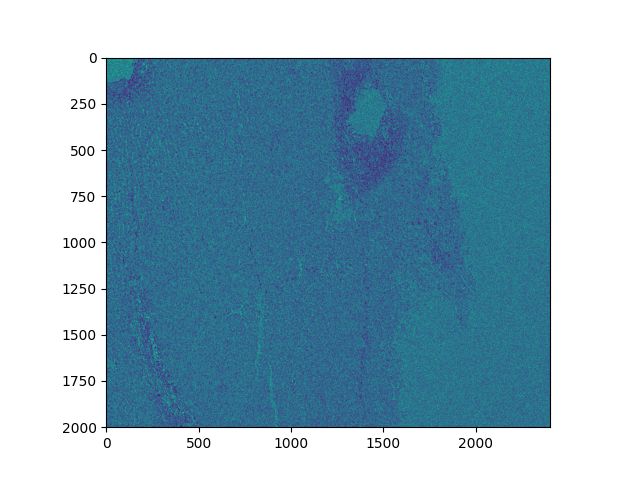

percent80
(390,)


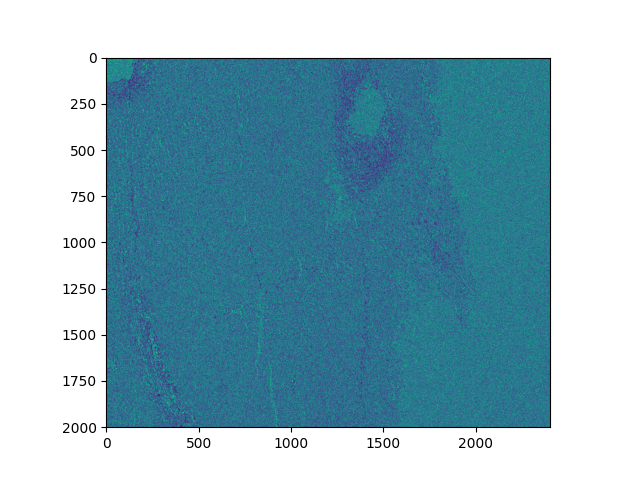

percent90
(439,)


In [ ]:
mask = - np.zeros(km_labels.shape[:2])
mask[:, 2100:] = 1
#mask[1250:, :] = 1
#mask[:, 0:500] = 1
#mask[:,1800:] = 1
interest_sp = mask * km_labels
plt.imshow(interest_sp)
print(np.shape(np.unique(interest_sp)))
contribute = expand.ContrastExpand(km_labels,interest_sp)
contri = expand.PlotPercent(contribute, file_path)

### Save background data

In [54]:
if os.path.exists('Database/background.mat'):
    background = list(loadmat('Database/background.mat')['background'])
else:
    tmp = []
    background = []
for i in np.unique(interest_sp):
    if int(i) == 0:
        continue
    tmp.append(groups[int(i)-1,:])
    background = np.stack(tmp, axis=0)
savemat('Database/background.mat',{'background':background})

In [133]:
import seaborn as sns
import matplotlib.style as style

In [134]:
column=['FinalM11','FinalM12','FinalM13','FinalM14','FinalM21','FinalM22','FinalM23','FinalM24','FinalM31','FinalM32','FinalM33','FinalM34','FinalM41','FinalM42','FinalM43','FinalM44']

In [ ]:
aaa = pd.DataFrame(mm,columns=column,dtype=float)
annot_kws={"fontsize":20}
plt.subplots(figsize = (30,20))
sns.heatmap(aaa.corr(),annot=True)
aaa.corr()